<a href="https://colab.research.google.com/github/gimquokka/ML/blob/master/Docs_Tutorial/PyTroch/Training_a_simple_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a Classifier🐶

## What about data?

## Training an image classifier

### 1. Loading and normalizting CIFAR10

In [118]:
import torch
import torchvision
import torchvision.transforms as transforms

In [119]:
# Check the original data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

Files already downloaded and verified
Files already downloaded and verified


In [120]:
trainset.data.shape

(50000, 32, 32, 3)

In [121]:
transfrom = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (.5, .5, .5))])

In [122]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform = transfrom)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, 
                                          shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)
testloader = torch.utils.data.DataLoader(trainset, batch_size=16, 
                                          shuffle=True, num_workers=2)


classes = ("plane", 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [123]:
# It's was not changed to tensor?
trainset.data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [124]:
# Check the data got from loader
dataiter = iter(trainloader)

images, labels = dataiter.next()

print(images[0][0])
print(images.shape)
print(labels.shape)

tensor([[ 0.9765,  0.8980,  0.8824,  ..., -0.4353, -0.5608, -0.6392],
        [ 0.9216,  0.9294,  0.8980,  ..., -0.3725, -0.3176, -0.3647],
        [ 0.9451,  0.8902,  0.6549,  ..., -0.6863, -0.2471, -0.0039],
        ...,
        [ 0.2549,  0.2078,  0.1137,  ...,  0.0196,  0.6941,  0.8510],
        [-0.2078, -0.2157, -0.2941,  ...,  0.4353,  0.6235,  0.7176],
        [-0.4745, -0.5216, -0.5922,  ...,  0.4588,  0.4980,  0.5529]])
torch.Size([16, 3, 32, 32])
torch.Size([16])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


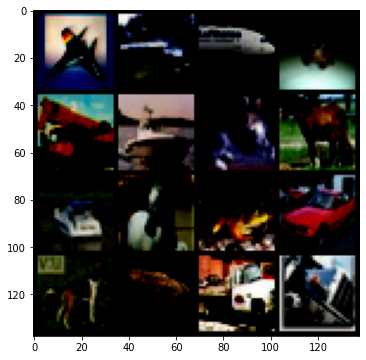

   plane |    truck |    plane |     frog
   truck |     ship |      cat |    horse
    ship |    horse |     frog |      car
     dog |     frog |    truck |    truck


In [125]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  plt.figure(figsize=(13, 6))
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  # plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
  plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow=4))

print(' | '.join('%8s'%classes[labels[j]] for j in range(4)))
print(' | '.join('%8s'%classes[labels[j]] for j in range(4, 8)))
print(' | '.join('%8s'%classes[labels[j]] for j in range(8, 12)))
print(' | '.join('%8s'%classes[labels[j]] for j in range(12, 16)))

In [126]:
print(torchvision.utils.make_grid(images, nrow=4).shape)

torch.Size([3, 138, 138])


### 2. Define a Convolutional Neural Network

In [127]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 12, 3)
    self.fc1 = nn.Linear(12*6*6, 120)
    self.fc2 = nn.Linear(120, 60)
    self.fc3 = nn.Linear(60, 10)
  
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 12*6*6)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    # x = F.softmax(self.fc3(x))
    x = self.fc3(x)
    return x

net = Net()

### 3. Define a Loss function and optimizer

In [128]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Train the network

#### Training on GPU?

In [129]:
device = torch.device("cuda: 0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [130]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=432, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)

In [131]:
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data[0].to(device), data[1].to(device)

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i%1000 == 999:
      print('[%d, %5d] loss: %.5f'%
           (epoch + 1, i + 1, running_loss/1000))
      running_loss = 0.0

print('Finish Training')

[1,  1000] loss: 2.30018
[1,  2000] loss: 2.22862
[1,  3000] loss: 1.95314
[2,  1000] loss: 1.72326
[2,  2000] loss: 1.61112
[2,  3000] loss: 1.53643
[3,  1000] loss: 1.47675
[3,  2000] loss: 1.42406
[3,  3000] loss: 1.39745
[4,  1000] loss: 1.34498
[4,  2000] loss: 1.31395
[4,  3000] loss: 1.30195
[5,  1000] loss: 1.24195
[5,  2000] loss: 1.22413
[5,  3000] loss: 1.22855
Finish Training


In [132]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### 5. Test the network on the test data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


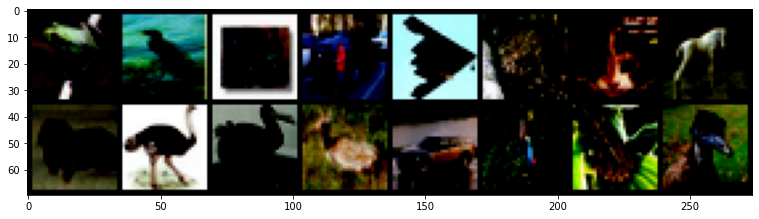

GT:    frog |   bird |   frog |    car |  plane |   frog |    cat |  horse
GT:     dog |   bird |   bird |   deer |    car |   bird |   frog |   bird


In [133]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, ))
print('GT: ', ' | '.join('%6s'%classes[labels[j]] for j in range(8)))
print('GT: ', ' | '.join('%6s'%classes[labels[j]] for j in range(8, 16)))

In [134]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' | '.join('%5s'%classes[predicted[j]] for j in range(8)))
print('Predicted: ', ' | '.join('%5s'%classes[predicted[j]] for j in range(8, 16)))

Predicted:    cat |  deer |   dog |  ship | truck | plane |  deer | horse
Predicted:  plane | horse | horse |   car |   car |   dog |  bird | truck


In [135]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%'% (
    (correct/total)*100))

Accuracy of the network on the 10000 test images: 57 %


In [136]:
outputs = net(images)
_, predicted = torch.max(outputs.data, 1)

print(outputs.data.size())
print(_) # Maximum Value in each sample
print(predicted) # Index that maximum val in located

torch.Size([16, 10])
tensor([1.3755, 4.2132, 5.1132, 7.2028, 3.3889, 2.9377, 4.2221, 4.2517, 5.0762,
        2.7236, 2.4890, 5.1308, 2.8747, 2.5583, 4.4888, 1.8757],
       device='cuda:0')
tensor([4, 8, 8, 6, 7, 1, 0, 6, 8, 2, 2, 6, 1, 6, 1, 2], device='cuda:0')


In [137]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
  for data in testloader:
    inputs, labels = data[0].to(device), data[1].to(device)
    outputs = net(inputs)
    _, predicted = torch.max(outputs, 1)
    # c = (predicted == labels).squeeze()
    c = (predicted == labels).squeeze()
    for i in range(16):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print("Accuracy of %8s : %2d %%"%(
      classes[i], 100*class_correct[i]/class_total[i]))
      

Accuracy of    plane : 57 %
Accuracy of      car : 75 %
Accuracy of     bird : 38 %
Accuracy of      cat : 42 %
Accuracy of     deer : 62 %
Accuracy of      dog : 43 %
Accuracy of     frog : 61 %
Accuracy of    horse : 70 %
Accuracy of     ship : 81 %
Accuracy of    truck : 47 %
